In [35]:
%load_ext autoreload
%autoreload 2

import random
import ray
import json
import pandas
from typing import Dict, List, Tuple, Set
from utils import *
from problem import *
from round import *
from heuristics import *
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%reset

In [2]:
from config import LOCATIONS, CLIENT_LOCATIONS

# FPT EXPERIMENTS WITH K and S SENSITIVITY

## No aggregation

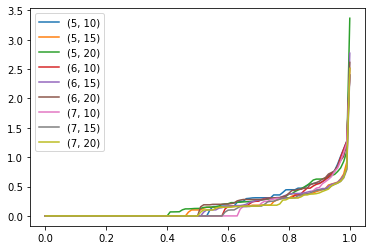

In [16]:
with open('fpt_exp_sensitivity_0.json', 'r') as file:
    data = json.load(file)
    for key in list(data.keys()):
        x = []
        y = []
        for i in range(0, 101, 1):
            x.append(i/100)
            y.append(calculate_percentile_objective(data[key]["assignments"], i/100))
        plt.plot(x, y, label = key)
    plt.legend()
    plt.show()

#### K senstivity

In [23]:
entries_fac = {}
entries_s = {}

with open('fpt_exp_sensitivity_0.json', 'r') as file:
    data = json.load(file)
    for key in data.keys():
        fac_num = int(key[key.index('(') + 1])
        s_num = int(key[key.index(',')+1:key.index(')')])
        
        if fac_num not in entries_fac.keys():
            entries_fac[fac_num] = [key]
        else:
            entries_fac[fac_num].append(key)
        
        if s_num not in entries_s.keys():
            entries_s[s_num] = [key]
        else:
            entries_s[s_num].append(key)

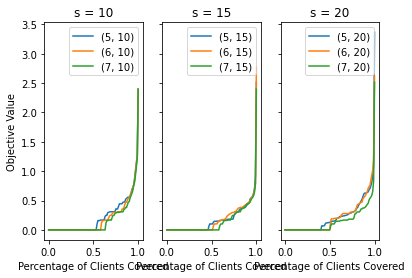

In [31]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True)

fac_options = list(entries_fac.keys())
s_options = list(entries_s.keys())

with open('fpt_exp_sensitivity_0.json', 'r') as file:
    data = json.load(file)

    for count in range(len(s_options)):
        for key in entries_s[s_options[count]]:
            x = []
            y = []
            for i in range(0, 101, 1):
                x.append(i/100)
                y.append(calculate_percentile_objective(data[key]["assignments"], i/100))
            ax[count].plot(x, y, label = key)
        
        ax[count].set_title(f"s = {s_options[count]}")
        ax[count].legend()
    
    '''
    for count in range(len(fac_options)):
        for key in entries_fac[fac_options[count]]:
            x = []
            y = []
            for i in range(0, 101, 1):
                x.append(i/100)
                y.append(calculate_percentile_objective(data[key]["assignments"], i/100))
            ax[1, count].plot(x, y, label = key)
            
        ax[1, count].set_title(f"k = {fac_options[count]}")'''
    
    for axs in ax.flat:
        axs.set(xlabel='Percentage of Clients Covered', ylabel='Objective Value')
    for axs in ax.flat:
        axs.label_outer()
    
    plt.show()

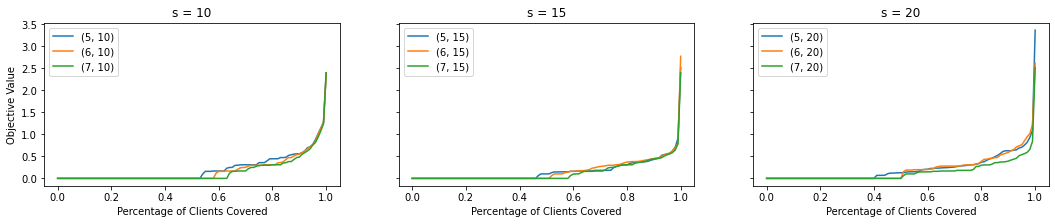

In [42]:
fig.set_figheight(3)
fig.set_figwidth(18)
fig

In [43]:
fig.savefig('FPT_facility_count_sensitivity', dpi = 500)

#### S sensitivity

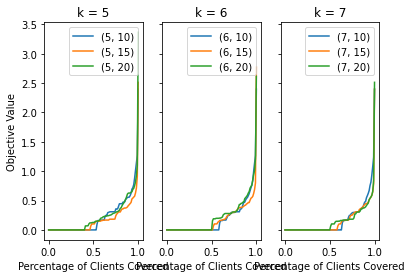

In [44]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True)

fac_options = list(entries_fac.keys())
s_options = list(entries_s.keys())

with open('fpt_exp_sensitivity_0.json', 'r') as file:
    data = json.load(file)

    for count in range(len(fac_options)):
        for key in entries_fac[fac_options[count]]:
            x = []
            y = []
            for i in range(0, 101, 1):
                x.append(i/100)
                y.append(calculate_percentile_objective(data[key]["assignments"], i/100))
            ax[count].plot(x, y, label = key)
            
        ax[count].set_title(f"k = {fac_options[count]}")
        ax[count].legend()
    
    for axs in ax.flat:
        axs.set(xlabel='Percentage of Clients Covered', ylabel='Objective Value')
    for axs in ax.flat:
        axs.label_outer()
    
    plt.show()

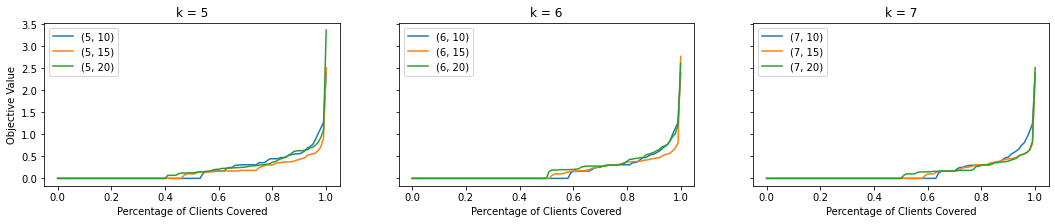

In [45]:
fig.set_figheight(3)
fig.set_figwidth(18)
fig

In [46]:
fig.savefig('FPT_s_count_sensitivity', dpi = 500)

## Set cover aggregation

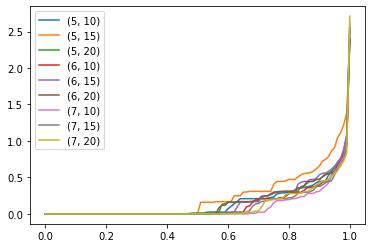

In [3]:
with open('fpt_exp_sensitivity_1.json', 'r') as file:
    data = json.load(file)
    for key in list(data.keys()):
        x = []
        y = []
        for i in range(0, 101, 1):
            x.append(i/100)
            y.append(calculate_percentile_objective(data[key]["assignments"], i/100))
        plt.plot(x, y, label = key)
    plt.legend()
    plt.show()

#### K sensitivity

In [4]:
entries_fac = {}
entries_s = {}

with open('fpt_exp_sensitivity_1.json', 'r') as file:
    data = json.load(file)
    for key in data.keys():
        fac_num = int(key[key.index('(') + 1])
        s_num = int(key[key.index(',')+1:key.index(')')])
        
        if fac_num not in entries_fac.keys():
            entries_fac[fac_num] = [key]
        else:
            entries_fac[fac_num].append(key)
        
        if s_num not in entries_s.keys():
            entries_s[s_num] = [key]
        else:
            entries_s[s_num].append(key)

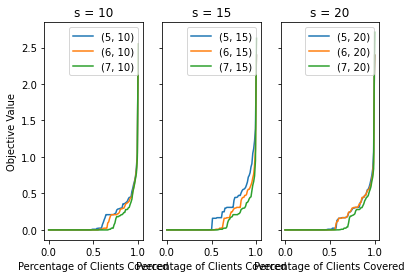

In [5]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True)

fac_options = list(entries_fac.keys())
s_options = list(entries_s.keys())

with open('fpt_exp_sensitivity_1.json', 'r') as file:
    data = json.load(file)

    for count in range(len(s_options)):
        for key in entries_s[s_options[count]]:
            x = []
            y = []
            for i in range(0, 101, 1):
                x.append(i/100)
                y.append(calculate_percentile_objective(data[key]["assignments"], i/100))
            ax[count].plot(x, y, label = key)
        
        ax[count].set_title(f"s = {s_options[count]}")
        ax[count].legend()
    
    '''
    for count in range(len(fac_options)):
        for key in entries_fac[fac_options[count]]:
            x = []
            y = []
            for i in range(0, 101, 1):
                x.append(i/100)
                y.append(calculate_percentile_objective(data[key]["assignments"], i/100))
            ax[1, count].plot(x, y, label = key)
            
        ax[1, count].set_title(f"k = {fac_options[count]}")'''
    
    for axs in ax.flat:
        axs.set(xlabel='Percentage of Clients Covered', ylabel='Objective Value')
    for axs in ax.flat:
        axs.label_outer()
    
    plt.show()

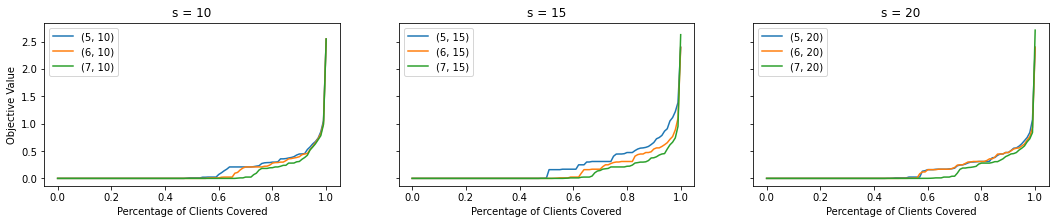

In [6]:
fig.set_figheight(3)
fig.set_figwidth(18)
fig

In [7]:
fig.savefig('FPT_facility_count_sensitivity_1', dpi = 500)

#### S sensitivity

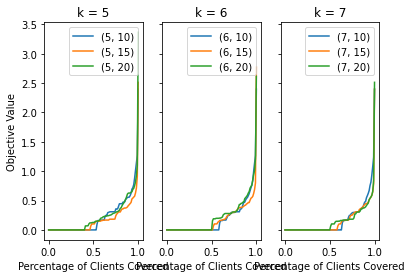

In [8]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True)

fac_options = list(entries_fac.keys())
s_options = list(entries_s.keys())

with open('fpt_exp_sensitivity_0.json', 'r') as file:
    data = json.load(file)

    for count in range(len(fac_options)):
        for key in entries_fac[fac_options[count]]:
            x = []
            y = []
            for i in range(0, 101, 1):
                x.append(i/100)
                y.append(calculate_percentile_objective(data[key]["assignments"], i/100))
            ax[count].plot(x, y, label = key)
            
        ax[count].set_title(f"k = {fac_options[count]}")
        ax[count].legend()
    
    for axs in ax.flat:
        axs.set(xlabel='Percentage of Clients Covered', ylabel='Objective Value')
    for axs in ax.flat:
        axs.label_outer()
    
    plt.show()

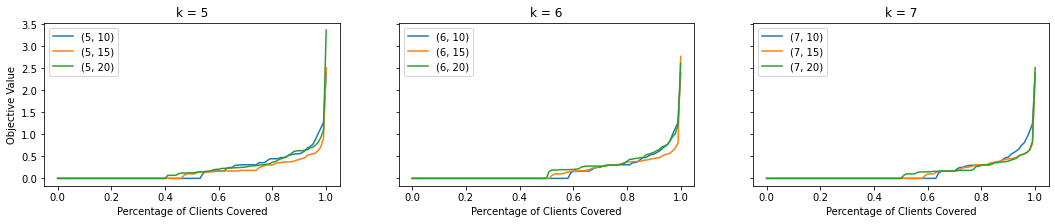

In [9]:
fig.set_figheight(3)
fig.set_figwidth(18)
fig

In [10]:
fig.savefig('FPT_s_count_sensitivity_1', dpi = 500)

# FPT EXPERIMENTS WITH AGGREGATION SENSITIVITY

5 10
0 0
5 15
0 1
5 20
0 2
6 10
1 0
6 15
1 1
6 20
1 2
7 10
2 0
7 15
2 1
7 20
2 2


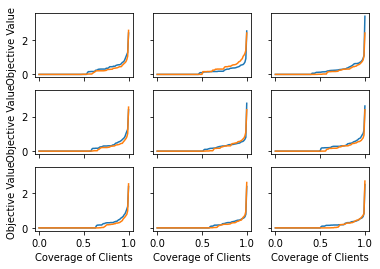

In [127]:
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True)

with open('fpt_exp_sensitivity_0.json', 'r') as file:
    data_0 = json.load(file)

with open('fpt_exp_sensitivity_1.json', 'r') as file:
    data_1 = json.load(file)
    
for key in data_0.keys():

    fac_0, assign_0 = data_0[key]['facilities'], data_0[key]['assignments']
    fac_1, assign_1 = data_1[key]['facilities'], data_1[key]['assignments']
    
    fac = int(key[key.index('(')+1:key.index(',')])
    s = int(key[key.index(',')+1:key.index(')')])
    
    print(fac, s)
    
    x = []
    y_0 = []
    y_1 = []
    
    for i in range(0, 101):
        x.append(i/100)
        y_0.append(calculate_percentile_objective(assign_0, i/100))
        y_1.append(calculate_percentile_objective(assign_1, i/100))
    
    k_ind = fac-5
    s_ind = s//5-2
    
    print(k_ind, s_ind)
    
    ax[k_ind][s_ind].plot(x, y_0, label = "no aggregation")
    ax[k_ind][s_ind].plot(x, y_1, label = "aggregation")
    
    if k_ind == 2:
        ax[k_ind][s_ind].set_xlabel("Coverage of Clients")
    if s_ind == 0:
        ax[k_ind][s_ind].set_ylabel("Objective Value")

In [100]:
for axs in [ax[0][0], ax[0][1], ax[0][2], ax[1, 2], ax[2,2]]:
    axs.axes.xaxis.set_visible(False)
    axs.axes.yaxis.set_visible(False)

In [103]:
for axs in [ax[i][0] for i in range(len(ax))]:
    axs.set_ylabel("Objective Value")
    axs.axes.yaxis.set_visible(True)

for axs in ax[2]:
    axs.set_xlabel("Coverage of Clients")
    axs.axes.xaxis.set_visible(True)

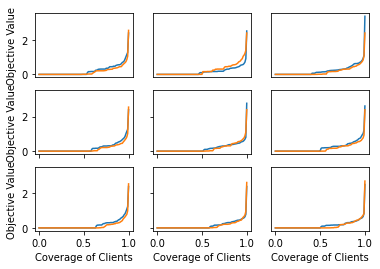

In [104]:
fig

In [128]:
fig.tight_layout

<bound method Figure.tight_layout of <Figure size 432x288 with 9 Axes>>

In [129]:
pad = 5

for axs, col in zip(ax[0], range(10, 21, 5)):
    axs.annotate(f"s={col}", xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for axs, row in zip(ax[:,0], range(5, 8)):
    axs.annotate(f"k={row}", xy=(0, 0.5), xytext=(-axs.yaxis.labelpad - pad, 0),
                xycoords=axs.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

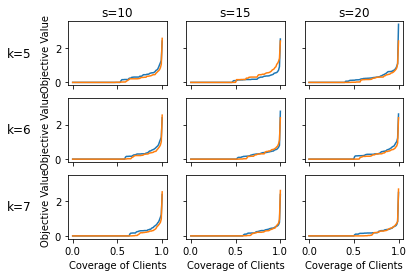

In [130]:
#fig.legend(["No Aggregation", "Aggregation"])
fig

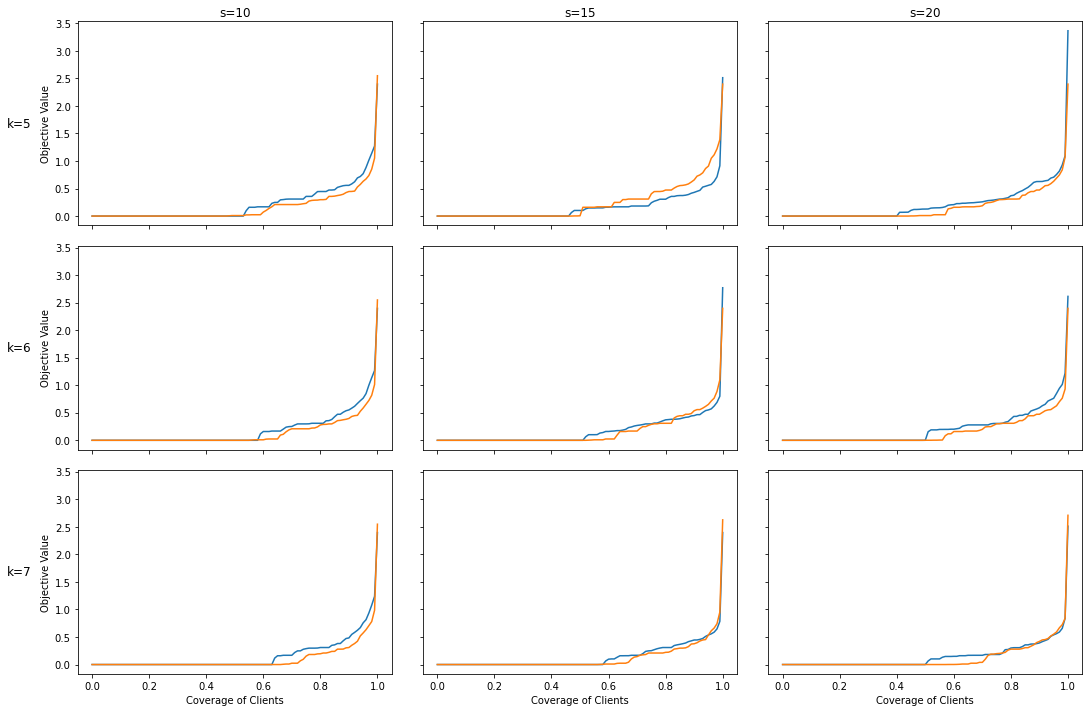

In [131]:
fig.set_figheight(12)
fig.set_figwidth(18)
fig.subplots_adjust(wspace=0.1, hspace=0.1)
fig

In [132]:
fig.savefig("FPT_aggregation_sensitivity.png", dpi = 500)

In [133]:
lines, labels = fig.axes[-1].get_legend_handles_labels()
print(lines, labels)

[<matplotlib.lines.Line2D object at 0x7faca2c2f700>, <matplotlib.lines.Line2D object at 0x7faca2c2f5e0>] ['no aggregation', 'aggregation']


In [142]:
leg = fig.legend(lines, labels, loc = 'lower center', ncol = 2)

In [140]:
leg.remove()

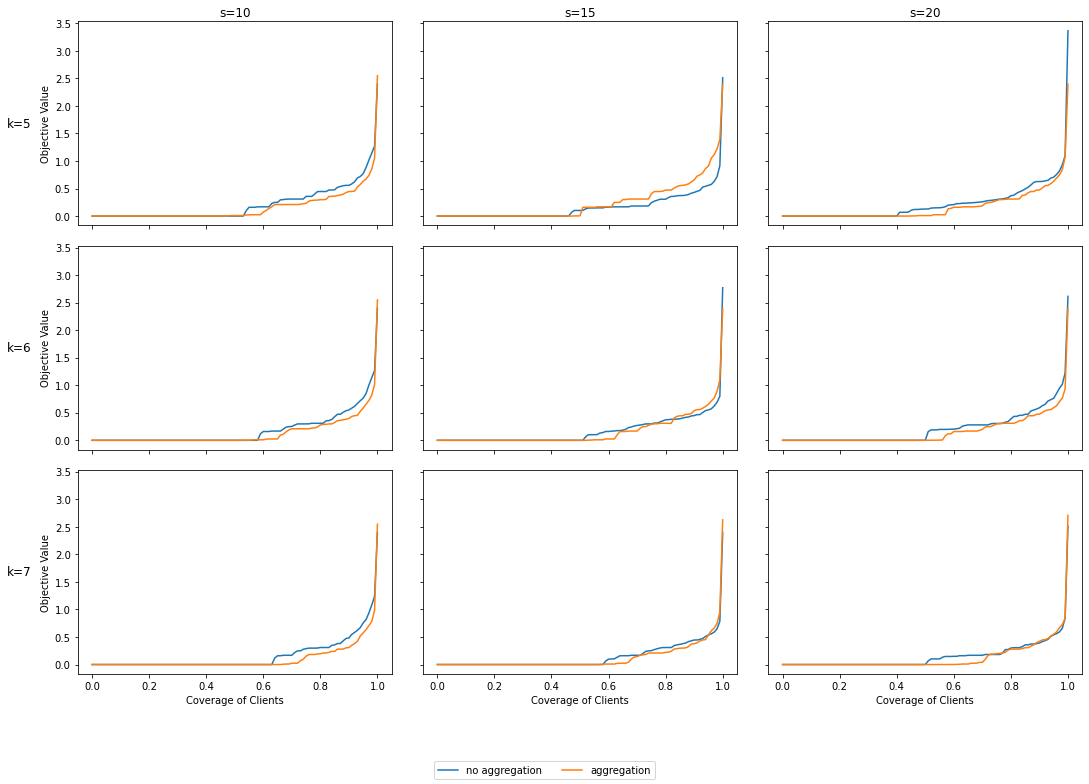

In [143]:
fig

In [144]:
fig.savefig("FPT_aggregation_sensitivity.png", dpi = 500)

# COMPARISON OF HEURISTICS

In [5]:
import matplotlib.pyplot as plt

In [155]:
from heuristics import center_of_homes_agg

In [149]:
fac, assign = center_of_homes_agg(5, 0)
print(fac)
print(calculate_objective(assign))

[64, 193, 2, 0, 46]
1.993687977423548


In [156]:
fac, assign = center_of_homes_agg(5, 1)
print(fac)
print(calculate_objective(assign))

[64, 193, 0, 14, 46]
1.9957973233734783


In [152]:
def most_populous_agg(k: int, aggregation: int):
    LOCATIONS_agg, CLIENT_LOCATIONS_agg = aggregate_data(aggregation)
    
    facilities = [LOCATIONS_agg[i]['lid_ind'] for i in range(k)]
    return facilities, assign_facilities(facilities)

In [157]:
def center_of_centers_agg(k: int, aggregation: int = 0):
    """
    PARAMETERS
    ----------
    k : int
        number of facilities to be opened
    
    RETURNS
    ----------
    facilities : List[int]
        contains facility indices that are open
    assignments : List[Tuple[int, int]]
        visited location and facility assignment indexed by each client
    """
    clients = []
    
    LOCATIONS_center, CLIENT_LOCATIONS_center = aggregate_data(aggregation)
    
    for client in CLIENT_LOCATIONS_center.values():
        
        dispersion = 1e10
        effective_center = -1
        
        for center in client:
            
            max_dist = 0
            
            for loc in client:
                max_dist = max(calculate_distance(center, loc), max_dist)
                
            if max_dist < dispersion:
                dispersion = max_dist
                effective_center = center
                
        clients.append(effective_center)
        
    locations = [LOCATIONS_center[i]['lid_ind'] for i in range(len(LOCATIONS_center)) if LOCATIONS_center[i]['lid'] < HOME_SHIFT]
    facilities = _k_supplier(clients, locations)

In [159]:
from heuristics import _k_supplier

fac, assign = center_of_centers_agg(5, 0)
print(fac)
print(calculate_objective(assign))

TypeError: _k_supplier() missing 1 required positional argument: 'k'

In [ ]:
fac, assign = center_of_centers_agg(5, 1)
print(fac)
print(calculate_objective(assign))

In [153]:
fac, assign = most_populous_agg(5, 1)
print(fac)
print(calculate_objective(assign))

[14, 12, 106, 0, 1]
2.4889491885657695


In [154]:
fac, assign = most_populous_agg(5, 0)
print(fac)
print(calculate_objective(assign))

[0, 1, 2, 3, 4]
3.2832638117022177


In [3]:
def compare_heuristics_percentile(k: int, aggregation: int):
    fac_home, assign_home = center_of_homes_agg(k, aggregation)
    fac_center, assign_center = center_of_centers_agg(k, aggregation)
    fac_pop, assign_pop = most_populous_agg(k, aggregation)
    fac_fpt, assign_fpt = fpt3_parallel2(k, 15, aggregation)
    
    assignments = [assign_home, assign_center, assign_pop, assign_fpt]
    
    name_dict = {"center_of_homes_agg": "center of homes",
                "center of "}
    
    for assigned in assignments:
        x = []
        y = []
        
        for i in range(900, 10001, 1):
            x.append(i/1000)
            y.append(calculate_percentile_objective(assigned, i/1000))
        
        plt.plot(x, y, label = assigned.__name__)
    
    plt.legend()

In [15]:
def compare_heuristic_sensitivity():
    for k in range(5, 8):
        
        fac_home, assign_home = center_of_homes(k)
        fac_center, assign_center = center_of_centers(k)
        fac_pop, assign_pop = most_populous(k)
        fac_fpt, assign_fpt = fpt3_parallel2(k, 15, 1)
        
        assignments = [assign_home, assign_center, assign_pop, assign_fpt]
        x = []
        y = [[] for assign in assignments]
        
        x.append(k)
        for assigned_ind in range(len(assignments)):
            y[assigned_ind].append(calculate_objective(assignments[assigned_ind]))
    
    return x, y

In [16]:
x, y = compare_heuristic_sensitivity()

COVERAGE OF CLIENTS BY 15 LOCATIONS:  0.8774882374230908


2021-08-16 18:30:51,715	INFO worker.py:810 -- Calling ray.init() again after it has already been called.


COVERAGE OF CLIENTS BY 15 LOCATIONS:  0.8774882374230908


2021-08-16 18:34:56,985	INFO worker.py:810 -- Calling ray.init() again after it has already been called.


COVERAGE OF CLIENTS BY 15 LOCATIONS:  0.8774882374230908


2021-08-16 18:39:31,484	INFO worker.py:810 -- Calling ray.init() again after it has already been called.
